In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

# Zona limite

<Axes: >

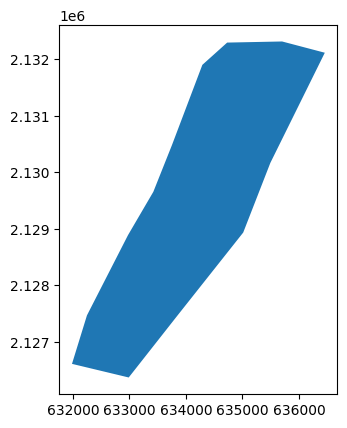

In [2]:
limite = gpd.read_file('qgis\zona_limite.gpkg')
limite = limite.to_crs('EPSG:32613')
limite.plot()

## read denue 2022

In [20]:
files = glob.glob('data/denue/*/conjunto_de_datos/*.shp')

In [30]:
def read_denues():
    cols_to_keep = ['nom_estab', 'raz_social','nombre_act','cve_ent','cve_mun','cve_loc','ageb','localidad','geometry']
    gdf_full = pd.DataFrame()
    for file in files:
        denue = gpd.read_file(file)
        
        denue = denue[denue['cve_ent'] == '06']
        #denue.drop(columns=['geometry'], inplace=True)
        denue = denue[cols_to_keep]
        name = file.split('\\')[1]
        denue.to_file(f'data/denue/{name}/{name}.gpkg', driver='GPKG')
        
        gdf_full = pd.concat([gdf_full, denue], ignore_index=True)
    gdf_full = gpd.GeoDataFrame(gdf_full, geometry='geometry', crs='EPSG:4326')
    return gdf_full


def read_denues_colima():
    files = glob.glob('data/denue/*/*.gpkg')
    print(files)
    gdf_full = pd.DataFrame()
    for file in files:
        denue = gpd.read_file(file)
        gdf_full = pd.concat([gdf_full, denue], ignore_index=True)
    
    return gdf_full
gdf_full = read_denues_colima()
gdf_full 

['data/denue\\educacion\\educacion.gpkg', 'data/denue\\gas_luz_agua\\gas_luz_agua.gpkg', 'data/denue\\salud\\salud.gpkg']


,nom_estab,raz_social,nombre_act,cve_ent,cve_mun,cve_loc,ageb,localidad,geometry
0,ESCUELA PRIMARIA J JESUS DIAZ VIRGEN TV,SECRETARIA DE EDUCACION PUBLICA,Escuelas de educación primaria del sector público,06,007,0001,1064,Manzanillo,POINT (-104.30341 19.09971)
1,ESCUELA PRIMARIA GRAL IGNACIO ZARAGOZA TM 06DP...,CSE,Escuelas de educación primaria del sector público,06,001,0007,0221,Cofradía de Juárez,POINT (-103.95443 18.96030)
2,ESCUELA PRIMARIA GORGONIO AVALOS TM 06DPR01840,SECRETARIA DE EDUCACION PÚBLICA,Escuelas de educación primaria del sector público,06,003,0035,0086,Suchitlán,POINT (-103.71008 19.37058)
3,ESCUELA PRIMARIA GORGONIO AVALOS TV 06DPR0390X,SECRETARIA DE EDUCACION PÚBLICA,Escuelas de educación primaria del sector público,06,003,0035,0086,Suchitlán,POINT (-103.71008 19.37058)
4,INSTITUTO DE INGLES INTERHALL,None,Escuelas de idiomas del sector privado,06,007,0001,1331,Manzanillo,POINT (-104.31518 19.10614)
...,...,...,...,...,...,...,...,...,...
2933,CONSULTORIO DE ODONTOLOGIA ESPECIALIZADA,None,Consultorios dentales del sector privado,06,002,0001,1068,Colima,POINT (-103.71597 19.27031)
2934,CONSULTORIO DE NUTRIOLOGA SIN NOMBRE,None,Consultorios de nutriólogos y dietistas del se...,06,002,0001,0318,Colima,POINT (-103.72343 19.25635)
2935,CONSULTORIO DE OFTAMOLOGIA,None,Consultorios de medicina especializada del sec...,06,002,0001,0746,Colima,POINT (-103.72635 19.24580)
2936,CONSULTORIO DE OFTALMOLOGIA,None,Consultorios de medicina especializada del sec...,06,009,0001,0499,Tecomán,POINT (-103.87597 18.91184)


In [31]:
list_agebs = ['1640', '1617', '1621', '0676', '0727', '1142', '0411', '1481',
       '1068', '0708', '1458', '0318', '0680', '0712', '0746', '0750',
       '0765', '0816', '1123', '1227', '1265', '127A', '0801', '0835',
       '0924', '1439', '1462', '0322', '077A', '0981', '1513', '1528',
       '1301', '1053', '1072', '0731', '166A', '1710', '006A', '0074',
       '1655', '1636', '0362']

In [32]:
gdf_full = gdf_full[gdf_full['cve_mun'] == '002']
gdf_full = gdf_full[gdf_full['ageb'].isin(list_agebs)]
gdf_full

,nom_estab,raz_social,nombre_act,cve_ent,cve_mun,cve_loc,ageb,localidad,geometry
5,INSTITUTO EDUCATICATIVO COLIMENSE,None,Escuelas de educación superior del sector privado,06,002,0001,0750,Colima,POINT (-103.73018 19.23821)
7,INSTITUTO ESTATAL DE EDUCACION PARA ADULTO,GOBIERNO FEDERAL,Escuelas del sector público que combinan diver...,06,002,0001,077A,Colima,POINT (-103.71581 19.24033)
8,INSTITUTO EDUCATIVO CHAMI DE COLIMA INICIAL 06...,INSTITUTO EDUCATIVO TAMAITI DE COLIMA SC,Escuelas de educación preescolar del sector pr...,06,002,0001,077A,Colima,POINT (-103.71673 19.23915)
14,INSTITUTO ESTATAL DE EDUCACION PARA ADULTOS,INSTITUTO NACIONAL DE EDUCACION PARA ADULTOS,Escuelas del sector público que combinan diver...,06,002,0001,0680,Colima,POINT (-103.72798 19.25586)
17,ESCUELA PRIMARIA GREGORIO TORRES QUINTERO TURN...,SECRETARIA DE EDUCACION PUBLICA 06EPR0018P TUR...,Escuelas de educación primaria del sector público,06,002,0001,0746,Colima,POINT (-103.72550 19.24374)
...,...,...,...,...,...,...,...,...,...
2923,CONSULTORIO DE NUTRICION,None,Consultorios de nutriólogos y dietistas del se...,06,002,0001,1053,Colima,POINT (-103.70801 19.26890)
2933,CONSULTORIO DE ODONTOLOGIA ESPECIALIZADA,None,Consultorios dentales del sector privado,06,002,0001,1068,Colima,POINT (-103.71597 19.27031)
2934,CONSULTORIO DE NUTRIOLOGA SIN NOMBRE,None,Consultorios de nutriólogos y dietistas del se...,06,002,0001,0318,Colima,POINT (-103.72343 19.25635)
2935,CONSULTORIO DE OFTAMOLOGIA,None,Consultorios de medicina especializada del sec...,06,002,0001,0746,Colima,POINT (-103.72635 19.24580)


In [36]:
gdf_full["nombre_act"].unique()

array(['escuelas de educación superior del sector privado',
       'escuelas del sector público que combinan diversos niveles de educación',
       'escuelas de educación preescolar del sector privado',
       'escuelas de educación primaria del sector público',
       'escuelas de educación técnica superior del sector privado',
       'escuelas del sector privado que combinan diversos niveles de educación',
       'escuelas de educación media superior del sector privado',
       'escuelas de educación secundaria técnica del sector público',
       'escuelas de deporte del sector privado',
       'escuelas de idiomas del sector privado',
       'escuelas de educación preescolar del sector público',
       'otros servicios educativos proporcionados por el sector privado',
       'escuelas de educación superior del sector público',
       'servicios de profesores particulares',
       'escuelas de arte del sector privado',
       'escuelas del sector público de educación para necesidades

In [34]:
gdf_full['nombre_act'] = gdf_full['nombre_act'].str.lower()

In [37]:
gdf = gdf_full[gdf_full['nombre_act'].str.contains("educación|medicina|hospital|refugios|suministro|electricidad|eléctrica")]
gdf

,nom_estab,raz_social,nombre_act,cve_ent,cve_mun,cve_loc,ageb,localidad,geometry
5,INSTITUTO EDUCATICATIVO COLIMENSE,None,escuelas de educación superior del sector privado,06,002,0001,0750,Colima,POINT (-103.73018 19.23821)
7,INSTITUTO ESTATAL DE EDUCACION PARA ADULTO,GOBIERNO FEDERAL,escuelas del sector público que combinan diver...,06,002,0001,077A,Colima,POINT (-103.71581 19.24033)
8,INSTITUTO EDUCATIVO CHAMI DE COLIMA INICIAL 06...,INSTITUTO EDUCATIVO TAMAITI DE COLIMA SC,escuelas de educación preescolar del sector pr...,06,002,0001,077A,Colima,POINT (-103.71673 19.23915)
14,INSTITUTO ESTATAL DE EDUCACION PARA ADULTOS,INSTITUTO NACIONAL DE EDUCACION PARA ADULTOS,escuelas del sector público que combinan diver...,06,002,0001,0680,Colima,POINT (-103.72798 19.25586)
17,ESCUELA PRIMARIA GREGORIO TORRES QUINTERO TURN...,SECRETARIA DE EDUCACION PUBLICA 06EPR0018P TUR...,escuelas de educación primaria del sector público,06,002,0001,0746,Colima,POINT (-103.72550 19.24374)
...,...,...,...,...,...,...,...,...,...
2849,CONSULTORIO DEL DR JUAN GONZALO MADRIGAL ANGULO,None,consultorios de medicina especializada del sec...,06,002,0001,077A,Colima,POINT (-103.72121 19.23951)
2851,CONSULTORIO DEL DR MIGUEL ANGEL MATRINEZ MORA ...,None,consultorios de medicina general del sector pr...,06,002,0001,077A,Colima,POINT (-103.72234 19.23944)
2852,CONSULTORIO DEL DR. ARTURO NAVARRO,None,consultorios de medicina general del sector pr...,06,002,0001,0924,Colima,POINT (-103.70661 19.26013)
2853,CONSULTORIO DEL DR ROBERTO PEREZ AYALA,None,consultorios de medicina general del sector pr...,06,002,0001,077A,Colima,POINT (-103.72121 19.23951)


## demograficos

In [40]:
def read_imu_xls():
       imu = pd.read_excel('data/IM/IMU_2020.xls', sheet_name='IMU_2020')
       imu = imu[imu["ENT"] == 6]
       imu = imu[imu["MUN"] == 2]
       imu = imu[imu["LOC"] == 1]
       imu = imu[["AGEB",'P6A14NAE', 'SBASC', 'PSDSS', 'OVSDE', 'OVSEE',
              'OVSAE', 'OVPT', 'OVSREF', 'OVSINT', 'OVSCEL', 'OVHAC']]
       imu.rename(columns={'AGEB':'ageb'}, inplace=True)
       imu.to_csv('data/IM/IMU_2020.csv', index=False)
       return imu

#imu = read_imu_xls()
imu = pd.read_csv('data/IM/IMU_2020.csv')
imu

,ageb,P6A14NAE,SBASC,PSDSS,OVSDE,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC
4836,0021,6.493506,21.711457,16.554261,0.000000,0.000000,0.000000,0.000000,1.487911,20.334780,5.951643,7.997520
4837,0290,1.000000,17.972350,17.864924,0.131637,0.131637,0.043879,0.219394,2.369460,19.569987,4.563405,9.789289
4838,0318,6.632653,20.629159,19.384615,0.000000,0.102881,0.000000,2.263374,3.086420,23.971193,7.929969,12.397119
4839,0322,4.326923,14.885496,18.428438,0.000000,0.374707,0.000000,0.093677,1.030445,13.348946,6.791569,5.995316
4840,0337,2.105263,7.071547,14.951165,0.000000,0.000000,0.000000,0.375657,0.000000,5.393258,3.220974,4.419476
...,...,...,...,...,...,...,...,...,...,...,...,...
4944,1655,2.531646,2.539062,15.015015,0.000000,0.000000,0.000000,0.000000,0.000000,2.402402,1.201201,4.204204
4945,1674,2.693603,11.354738,12.059765,0.000000,0.053476,0.000000,0.000000,3.582888,31.069519,1.122995,51.283422
4946,1689,0.000000,16.872428,18.449198,0.000000,0.802139,0.000000,1.336898,4.278075,48.387097,3.743316,64.705882
4947,1706,0.000000,1.709402,9.815951,0.000000,0.000000,0.000000,0.000000,0.000000,4.907975,0.000000,3.680982


In [41]:
gdf = gdf.merge(imu, on='ageb', how='left')
gdf

,nom_estab,raz_social,nombre_act,cve_ent,cve_mun,cve_loc,ageb,localidad,geometry,P6A14NAE,SBASC,PSDSS,OVSDE,OVSEE,OVSAE,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC
0,INSTITUTO EDUCATICATIVO COLIMENSE,None,escuelas de educación superior del sector privado,06,002,0001,0750,Colima,POINT (-103.73018 19.23821),4.090909,24.190178,20.730634,0.846325,0.579065,0.668151,0.846325,4.276169,31.403118,8.685969,14.610245
1,INSTITUTO ESTATAL DE EDUCACION PARA ADULTO,GOBIERNO FEDERAL,escuelas del sector público que combinan diver...,06,002,0001,077A,Colima,POINT (-103.71581 19.24033),21.637427,25.984683,20.266413,0.000000,0.669216,0.239006,0.669216,5.401530,29.063098,7.122371,13.479924
2,INSTITUTO EDUCATIVO CHAMI DE COLIMA INICIAL 06...,INSTITUTO EDUCATIVO TAMAITI DE COLIMA SC,escuelas de educación preescolar del sector pr...,06,002,0001,077A,Colima,POINT (-103.71673 19.23915),21.637427,25.984683,20.266413,0.000000,0.669216,0.239006,0.669216,5.401530,29.063098,7.122371,13.479924
3,INSTITUTO ESTATAL DE EDUCACION PARA ADULTOS,INSTITUTO NACIONAL DE EDUCACION PARA ADULTOS,escuelas del sector público que combinan diver...,06,002,0001,0680,Colima,POINT (-103.72798 19.25586),0.813008,13.492063,17.745303,0.000000,0.000000,0.000000,1.230101,1.664255,19.464544,8.465991,5.065123
4,ESCUELA PRIMARIA GREGORIO TORRES QUINTERO TURN...,SECRETARIA DE EDUCACION PUBLICA 06EPR0018P TUR...,escuelas de educación primaria del sector público,06,002,0001,0746,Colima,POINT (-103.72550 19.24374),1.923077,10.915493,20.382166,0.109529,0.219058,0.000000,0.109529,2.957284,18.181818,6.681271,8.433735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,CONSULTORIO DEL DR JUAN GONZALO MADRIGAL ANGULO,None,consultorios de medicina especializada del sec...,06,002,0001,077A,Colima,POINT (-103.72121 19.23951),21.637427,25.984683,20.266413,0.000000,0.669216,0.239006,0.669216,5.401530,29.063098,7.122371,13.479924
390,CONSULTORIO DEL DR MIGUEL ANGEL MATRINEZ MORA ...,None,consultorios de medicina general del sector pr...,06,002,0001,077A,Colima,POINT (-103.72234 19.23944),21.637427,25.984683,20.266413,0.000000,0.669216,0.239006,0.669216,5.401530,29.063098,7.122371,13.479924
391,CONSULTORIO DEL DR. ARTURO NAVARRO,None,consultorios de medicina general del sector pr...,06,002,0001,0924,Colima,POINT (-103.70661 19.26013),1.515152,3.675048,15.296053,0.000000,0.000000,0.000000,0.000000,0.164474,2.302632,0.986842,2.302632
392,CONSULTORIO DEL DR ROBERTO PEREZ AYALA,None,consultorios de medicina general del sector pr...,06,002,0001,077A,Colima,POINT (-103.72121 19.23951),21.637427,25.984683,20.266413,0.000000,0.669216,0.239006,0.669216,5.401530,29.063098,7.122371,13.479924


In [19]:
# SAVE TO GPKG
gdf.to_file("data/denue/denue_inegi_final.gpkg", driver='GPKG', index=False)

10158    633121.957396
10208    633791.822092
10365    634823.711333
10401    633641.783697
10431    633457.022144
             ...      
28173    632827.914938
28174    633294.581626
28204    634564.071606
28208    634214.992248
28219    634076.967022
Length: 185, dtype: float64